In [461]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [462]:
df = pd.read_csv('D:/Python Dev/Data analytics/Indian startup project/startup_funding.csv')

# Data cleaning

In [463]:
# Cleaning Cities Name
df.replace('Ahmedabad','Ahemdabad',inplace = True)
df.replace(['Bengaluru','Bangalore / SFO','Bangalore / San Mateo','Bangalore/ Bangkok','Banglore'],'Bangalore',inplace = True)
df.replace('Bhubneswar','bhubaneswar',inplace = True)
df.replace(['Delhi','New Delhi / US','New Delhi/ Houston','Nw Delhi'],'New Delhi',inplace = True)
df.replace(['Mumbai / Global','Mumbai/Bengaluru'],'Mumbai',inplace = True)
df.replace(['Pune / Dubai','Pune / Singapore','Pune / US','Pune/Seattle'],'Pune',inplace = True)
df.replace('Gurgaon','Gurugram',inplace=True)

# Cleaning Rounds Names
df.replace(['Pre Series A', 'Pre-series A', 'pre-Series A', 'pre-series A'], 'Pre-Series A', inplace=True)
df.replace(['Angel / Seed Funding', 'Seed/ Angel Funding', 'Seed / Angle Funding', 'Seed/ Angel Funding', 'Seed/Angel Funding','Seed / Angel Funding'], 'Seed/Angel Funding', inplace=True)
df.replace(['Seed Round','Seed','Seed funding'], 'Seed Funding', inplace=True)
df.replace('Debt-Funding','Debt Funding',inplace = True)
df.replace('Private','Private Funding',inplace = True)
df.replace('Angel','Angel Round',inplace = True)
df.replace('Private Equity Round','Private Equity',inplace = True)


# cleaning vertical name
df.replace(['ECommerce', 'eCommerce', 'Ecommerce', 'E-commerce'],'E-Commerce', inplace=True)
df.replace(['E-Tech', 'EdTech'],'Ed-Tech', inplace=True)
df.replace('FinTech','Fin-Tech', inplace=True)

# cleaning company name
df.replace('DST Global and Lightspeed Venture Partners\\\\xe2\\\\x80\\\\x99 global fund.','DST Global',inplace = True)
df.replace(['SoftBank Group','Softbank Group','Softbank Group Corp'],'Softbank',inplace = True)

In [464]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,Fin-Tech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000",NaN


## 1

In [465]:
df.drop(columns =['Remarks'] ,inplace =True )

In [466]:
df.set_index('Sr No',inplace = True)

## 2

In [467]:
df.rename(columns = {
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup_name',
    'Industry Vertical':'industry',
    'SubVertical':'category',
    'City  Location':'location',
    'Investors Name':'investors',
    'InvestmentnType':'investment_type',
    'Amount in USD':'investment_amount'
    },inplace = True)

In [468]:
df.head()

,date,startup_name,industry,category,location,investors,investment_type,investment_amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,Fin-Tech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000"


## 3

In [469]:
df['date'].unique()

array(['09/01/2020', '13/01/2020', '02/01/2020', ..., '29/01/2015',
       '30/01/2015', '31/01/2015'], dtype=object)

In [470]:
df.loc[df['date'] == '\\\\xc2\\\\xa010/7/2015', 'date'] = '10/07/2015'
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

## 4

In [471]:
df['investment_amount'] = df['investment_amount'].str.replace(',','')
df['investment_amount'] = df['investment_amount'].str.replace('undisclosed','0')
df['investment_amount'] = df['investment_amount'].str.replace('unknown','0')
df['investment_amount'] = df['investment_amount'].str.replace('Undisclosed','0')
df['investment_amount'] = df['investment_amount'].replace({r'\\xc2\\xa0': '', r'\\xa0': '', r'[^0-9.]': ''}, regex=True)
df['investment_amount'] = pd.to_numeric(df['investment_amount'], errors='coerce').fillna(0).astype(float)

In [472]:
df['investment_amount'] = (df['investment_amount']*82.5/(10000000)).round(2)

## 5

In [473]:
df['category']= df['category'].fillna('unknown')

In [474]:
df = df.dropna(subset=['industry', 'location', 'investors', 'investment_type'])

In [475]:
df.isnull().sum()

date                 5
startup_name         0
industry             0
category             0
location             0
investors            0
investment_type      0
investment_amount    0
dtype: int64

In [476]:
df.head()

,date,startup_name,industry,category,location,investors,investment_type,investment_amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,1650.00
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,66.40
3,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,151.46
4,2020-01-02,https://www.wealthbucket.in/,Fin-Tech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,24.75
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,14.85


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2836 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2831 non-null   datetime64[ns]
 1   startup_name       2836 non-null   object        
 2   industry           2836 non-null   object        
 3   category           2836 non-null   object        
 4   location           2836 non-null   object        
 5   investors          2836 non-null   object        
 6   investment_type    2836 non-null   object        
 7   investment_amount  2836 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 199.4+ KB


In [478]:
# In this datat set we perform data cleaning 
# 1. Removed remarks column and Convert SrNo colums to index 
# 2. Rename the columns to to short and understanding version
# 3. convert string date to date format 
# 4. clean the values in investment_amount column and round it in lac 
# 5. deal with null values

In [479]:
df.to_csv('D:/Python Dev/Data analytics/Indian startup project/Startup project cleaned.csv')

In [480]:
sd = pd.read_csv('D:/Python Dev/Data analytics/Indian startup project/Startup project cleaned.csv')
sd

,Sr No,date,startup_name,industry,category,location,investors,investment_type,investment_amount
0,1,2020-01-09,BYJU’S,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,1650.00
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,66.40
2,3,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,151.46
3,4,2020-01-02,https://www.wealthbucket.in/,Fin-Tech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,24.75
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,14.85
...,...,...,...,...,...,...,...,...,...
2831,2869,2015-04-29,Tracxn,Startup Analytics platform,unknown,Bangalore,SAIF Partners,Private Equity,28.88
2832,2870,2015-04-29,Dazo,Mobile Food Ordering app,unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.00
2833,2871,2015-04-29,Tradelab,Financial Markets Software,unknown,Bangalore,Rainmatter,Seed Funding,3.30
2834,2872,2015-04-29,PiQube,Hiring Analytics platform,unknown,Chennai,The HR Fund,Seed Funding,4.12


In [481]:
sd['investers1']=sd['investors'].str.split(',')

In [482]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr No              2836 non-null   int64  
 1   date               2831 non-null   object 
 2   startup_name       2836 non-null   object 
 3   industry           2836 non-null   object 
 4   category           2836 non-null   object 
 5   location           2836 non-null   object 
 6   investors          2836 non-null   object 
 7   investment_type    2836 non-null   object 
 8   investment_amount  2836 non-null   float64
 9   investers1         2836 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 221.7+ KB


In [483]:
sd['date'] = pd.to_datetime(sd['date'], errors='coerce')


In [484]:
sd.drop(sd[sd['date'].dt.year == 2020].index, inplace=True)

# 1. Top 5 Most Funded Startups
Problem Statement: Which are the top 5 startups in terms of total funding received?e.


In [485]:
summed_investments = df.groupby("startup_name", as_index=False).agg({"investment_amount": "sum"})


top_5_summed = summed_investments.sort_values(by="investment_amount", ascending=False).head(5)
top_5_summed

,startup_name,investment_amount
643,Flipkart,33492.52
1546,Rapido Bike Taxi,32175.00
1410,Paytm,25978.84
1352,Ola,8122.12
1983,Udaan,7177.50


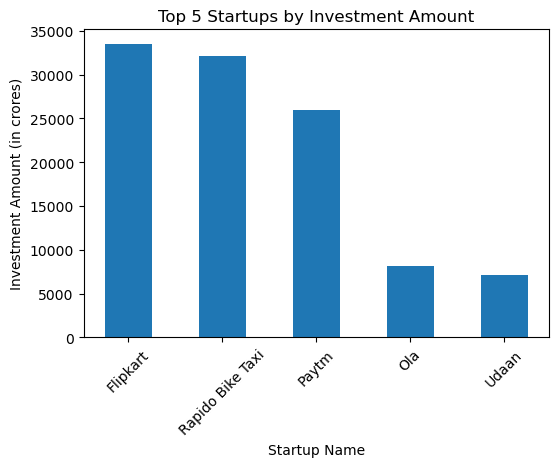

In [486]:
# Plot a bar chart with Startup Names and Investment Amounts
plt.figure(figsize=(6, 4))
plt.bar(top_5_summed['startup_name'], top_5_summed['investment_amount'],  width= 0.5)
plt.xlabel('Startup Name')
plt.ylabel('Investment Amount (in crores)')
plt.title('Top 5 Startups by Investment Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## 2. Yearly investment analysis

In [487]:
sd['date'] = pd.to_datetime(sd['date'], errors='coerce')

In [488]:
sd['year'] = sd['date'].dt.year
sd['year']

7       2019.0
8       2019.0
9       2019.0
10      2019.0
11      2019.0
         ...  
2831    2015.0
2832    2015.0
2833    2015.0
2834    2015.0
2835    2015.0
Name: year, Length: 2829, dtype: float64

In [489]:
yearly_investment = sd.groupby('year', as_index=False ).agg({"investment_amount": "sum"})
yearly_investment

,year,investment_amount
0,2015.0,67792.29
1,2016.0,31581.07
2,2017.0,86019.48
3,2018.0,37182.95
4,2019.0,78257.76


[]

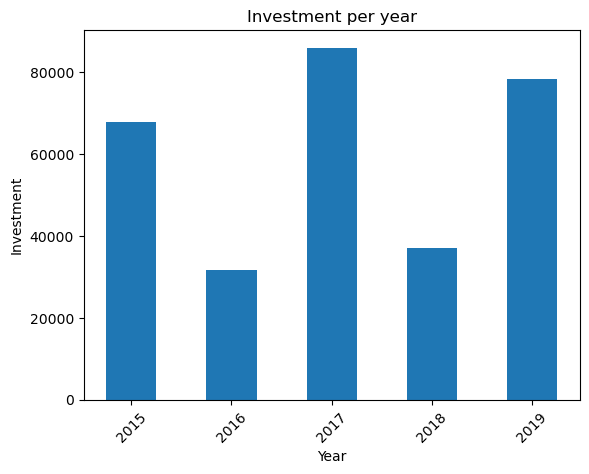

In [490]:
plt.bar(yearly_investment['year'],yearly_investment['investment_amount'],width= .5)
plt.xlabel('Year')
plt.ylabel('Investment')
plt.title('Investment per year')
plt.xticks(rotation=45)
plt.plot()

## 3.Mnthly investment analysis

In [491]:
sd['year_month'] = sd['date'].dt.to_period('M')
monthly_investment = sd.groupby('year_month')['investment_amount'].sum().reset_index()
monthly_investment

,year_month,investment_amount
0,2015-04,8080.88
1,2015-05,2641.11
2,2015-06,4302.30
3,2015-07,19841.49
4,2015-08,8776.44
5,2015-09,12123.53
6,2015-10,2103.43
7,2015-11,7399.87
8,2015-12,2523.24
9,2016-01,5774.00


In [492]:
monthly_investment['year_month'] = monthly_investment['year_month'].dt.to_timestamp()


In [493]:
monthly_investment


,year_month,investment_amount
0,2015-04-01,8080.88
1,2015-05-01,2641.11
2,2015-06-01,4302.30
3,2015-07-01,19841.49
4,2015-08-01,8776.44
5,2015-09-01,12123.53
6,2015-10-01,2103.43
7,2015-11-01,7399.87
8,2015-12-01,2523.24
9,2016-01-01,5774.00


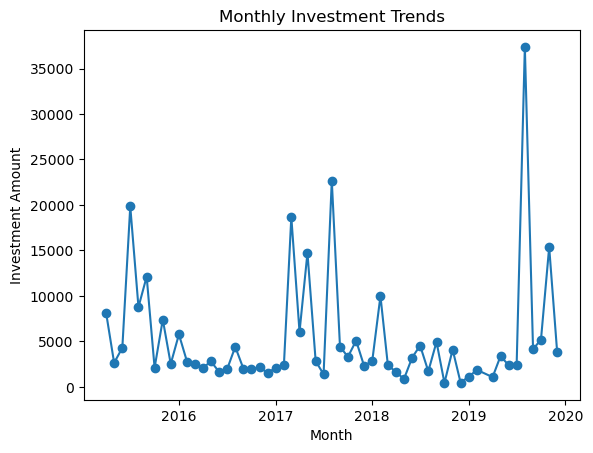

In [494]:
plt.plot(monthly_investment['year_month'], monthly_investment['investment_amount'], marker='o')
plt.xlabel('Month')
plt.ylabel('Investment Amount')
plt.title('Monthly Investment Trends')
plt.show()


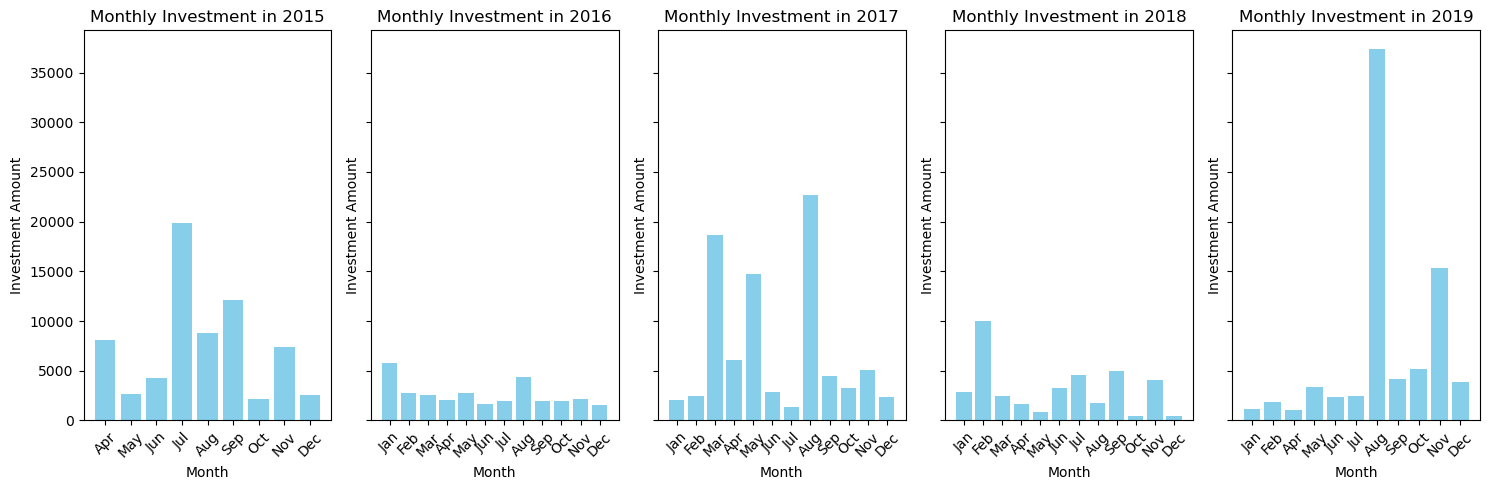

In [495]:
# Convert 'year_month' to datetime if it's not already in that format
monthly_investment['year_month'] = pd.to_datetime(monthly_investment['year_month'], errors='coerce')

# Extract unique years from the 'year_month' column
years = monthly_investment['year_month'].dt.year.unique()

# Create subplots with a grid of 1 row and number of columns equal to the number of years
fig, axes = plt.subplots(1, len(years), figsize=(15, 5), sharey=True)

# Loop through each year to create individual bar charts
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = monthly_investment[monthly_investment['year_month'].dt.year == year]
    
    # Plotting the bar chart for the current year
    axes[i].bar(year_data['year_month'].dt.strftime('%b'), year_data['investment_amount'], color='skyblue')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Investment Amount')
    axes[i].set_title(f'Monthly Investment in {year}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to fit everything neatly
plt.tight_layout()
plt.show()


## 4.location wise investment

In [496]:
sd['location'] = sd['location'].replace({
    'Bengaluru and Gurugram': 'Bangalore',
    'India/Singapore': 'Singapore',
    'Bangalore / Palo Alto': 'Bangalore',
    'Mumbai / UK': 'Mumbai',
    'New York, Bengaluru': 'Bangalore',
    'Noida / Singapore': 'Noida',
    'Goa/Hyderabad': 'Goa',
    'Noida / Singapore': 'Noida',
    'Mumbai / NY': 'Mumbai',
    'US/India': 'India',
    'SFO / Bangalore': 'Bangalore',
    'Seattle / Bangalore': 'Bangalore',
    'Bangalore / USA': 'Bangalore',
    'India / US': 'India',
    'Gurgaon / SFO': 'Gurugram',
    'New Delhi / California': 'New Delhi',
    'Hyderabad/USA': 'Hyderabad',
    'Goa': 'Goa',
    '\\\\xc2\\\\xa0Noida': 'Noida',
    '\\\\xc2\\\\xa0Bangalore': 'Bangalore',
    '\\\\xc2\\\\xa0Gurgaon': 'Gurugram',
    '\\\\xc2\\\\xa0New Delhi': 'New Delhi',
    '\\\\xc2\\\\xa0Mumbai': 'Mumbai',
    'New Delhi / California': 'New Delhi',
    'Delhi & Cambridge': 'New Delhi',
    'Kolkatta': 'Kolkata',
    'Ahemadabad': 'Ahemdabad',
    'Bhubaneswar': 'bhubaneswar',
})

In [497]:
sd['location'].unique()

array(['Pune', 'Gurugram', 'Bangalore', 'Noida', 'Faridabad',
       'San Francisco', 'San Jose,', 'Amritsar', 'New Delhi', 'Mumbai',
       'Kormangala', 'Hyderabad', 'Burnsville', 'Menlo Park', 'Palo Alto',
       'Santa Monica', 'Singapore', 'Taramani', 'Andheri', 'Chembur',
       'Haryana', 'New York', 'Karnataka', 'Bhopal', 'Jaipur', 'India/US',
       'Chennai', 'Nagpur', 'Indore', 'California', 'India', 'Rourkela',
       'Srinagar', 'bhubaneswar', 'Chandigarh', 'Kolkata', 'Coimbatore',
       'Udaipur', 'Ahemdabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Hubli', 'Kerala', 'Kozhikode',
       'US', 'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'London', 'Varanasi',
       'Jodhpur', 'Boston', 'USA/India', 'Belgaum', 'Chennai/ Singapore',
       'New York/ India'], dtype=object)

In [498]:
city_investment = sd.groupby('location')['investment_amount'].sum().reset_index()


In [499]:
top10city_investment = city_investment.sort_values (by='investment_amount',ascending=False).head(10)

In [500]:
top10city_investment =top10city_investment.sort_values (by='location',ascending=True)

In [501]:
print(top10city_investment)

      location  investment_amount
4    Bangalore          152722.58
12     Chennai            5855.60
18    Gurugram           30831.64
22   Hyderabad            3313.80
38  Menlo Park            3712.50
40      Mumbai           37489.43
42   New Delhi           29418.37
45       Noida           12236.09
48        Pune            5920.04
54   Singapore            2543.88


Text(0.5, 1.0, 'Top 10 most invested cities')

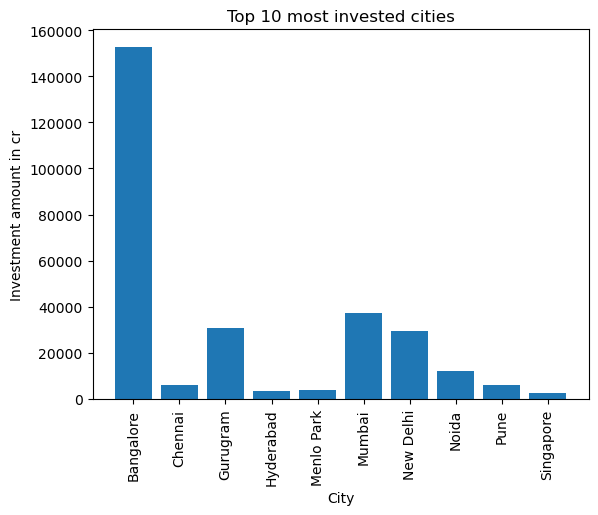

In [502]:
plt.bar(top10city_investment['location'],top10city_investment['investment_amount'])
plt.xticks (rotation =90)
plt.xlabel('City')
plt.ylabel('Investment amount in cr')
plt.title('Top 10 most invested cities')



## 5.Distribution of Investments by Industry 
funding distribution to each industry 


In [504]:
sd['industry'].unique()

array(['Technology', 'E-Commerce', 'Aerospace',
       'B2B-focused foodtech startup', 'Video', 'Gaming', 'Software',
       'Health and wellness', 'Education', 'Food and Beverage',
       'Health and Wellness', 'B2B Marketing', 'Fin-Tech', 'Video Games',
       'SaaS', 'Last Mile Transportation', 'Healthcare',
       'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Finance',
       'Customer Service Platform', 'Automotive', 'Ed-Tech', 'Services',
       'Transportation', 'Compliance', 'Transport',
       'Artificial Intelligence', 'Tech', 'Health Care', 'Luxury Label',
       'Waste Management Service', 'Deep-Tech', 'Energy', 'Digital Media',
       'Saas', 'Automobile', 'Agtech', 'Social Media', 'Fintech',
       'Edtech', 'AI', 'Nanotechnology', 'Hospitality',
       'Services Platform', 'Travel Tech', 'Online Education',
       'Online Marketplace', 'SaaS, Ecommerce', 'NBFC', 

In [510]:
industry_investment = sd.groupby('industry')['investment_amount'].sum().reset_index()
to10_industry_investment= industry_investment.sort_values ('investment_amount' , ascending=False).head(10)

In [517]:
industry_investment

,industry,investment_amount
0,360-degree view creating platform,0.00
1,3D Printer Manufacturer,24.75
2,AI,0.00
3,API Workflow platform,8.25
4,Accounting,41.25
...,...,...
797,solar products and services marketplace,0.00
798,us ticketing and fleet management platform,0.00
799,usiness expense management,4.12
800,"virtual reality, 3d simulation and stereoscopi...",6.60


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'E-Commerce'),
  Text(1, 0, 'Consumer Internet'),
  Text(2, 0, 'Transportation'),
  Text(3, 0, 'Technology'),
  Text(4, 0, 'Finance'),
  Text(5, 0, 'Fin-Tech'),
  Text(6, 0, 'Online Marketplace'),
  Text(7, 0, 'E-Commerce & M-Commerce platform'),
  Text(8, 0, 'B2B'),
  Text(9, 0, 'Car Aggregator & Retail Mobile App')])

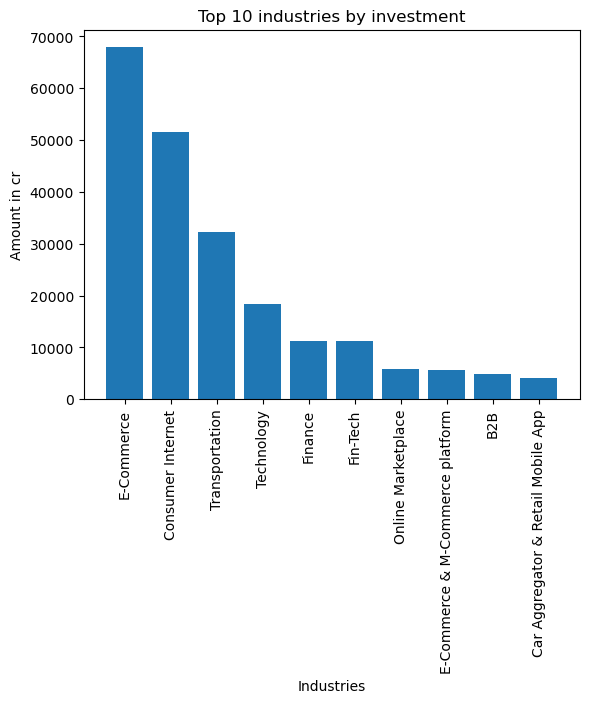

In [516]:
plt.bar(to10_industry_investment['industry'],to10_industry_investment['investment_amount'])
plt.title('Top 10 industries by investment')
plt.xlabel('Industries')
plt.ylabel('Amount in cr')
plt.xticks(rotation =90)